# 图像特效-暖色效果

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
src = cv2.imread('../datas/p3.jpg')
gray = cv2.imread('../datas/p3.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def create_LUT_8UC1(x, y):
    spl = UnivariateSpline(x, y)
    return spl(range(256))

In [6]:
def warm_color(src):
    if len(src.shape)<3:
        return None
    incr_ch_lut = create_LUT_8UC1([0, 64, 128, 192, 256],
        [0, 70, 140, 210, 256])
    decr_ch_lut = create_LUT_8UC1([0, 64, 128, 192, 256],
        [0, 30, 80, 120, 192])
    c_r, c_g, c_b = cv2.split(src)
    c_r = cv2.LUT(c_b, incr_ch_lut).astype(np.uint8)
    c_b = cv2.LUT(c_r, decr_ch_lut).astype(np.uint8)
    img_bgr_warm = cv2.merge((c_r, c_g, c_b))
    c_r = cv2.LUT(c_r, decr_ch_lut).astype(np.uint8)
    # 增加颜色饱和度
    c_h, c_s, c_v = cv2.split(cv2.cvtColor(img_bgr_warm,
        cv2.COLOR_RGB2HSV))
    c_s = cv2.LUT(c_s, incr_ch_lut).astype(np.uint8)
    dst = cv2.cvtColor(cv2.merge(
        (c_h, c_s, c_v)),
        cv2.COLOR_HSV2RGB)
    return dst

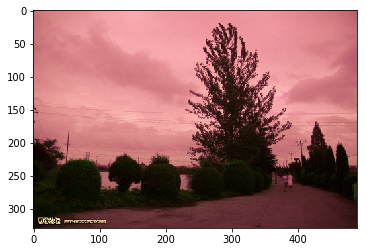

In [7]:
dst = warm_color(rgb)
plt.imshow(dst)

In [8]:
def cool_img(src):
    incr_ch_lut = create_LUT_8UC1([0, 64, 128, 192, 256],
        [0, 70, 140, 210, 256])
    decr_ch_lut = create_LUT_8UC1([0, 64, 128, 192, 256],
        [0, 30, 80, 120, 192])
    c_r, c_g, c_b = cv2.split(src)
    c_r = cv2.LUT(c_b, decr_ch_lut).astype(np.uint8)
    c_b = cv2.LUT(c_r, incr_ch_lut).astype(np.uint8)
    img_bgr_cold = cv2.merge((c_r, c_g, c_b))
     
    # decrease color saturation
    c_h, c_s, c_v = cv2.split(cv2.cvtColor(img_bgr_cold,
        cv2.COLOR_RGB2HSV))
    c_s = cv2.LUT(c_s, decr_ch_lut).astype(np.uint8)
    img_bgr_cold = cv2.cvtColor(cv2.merge(
        (c_h, c_s, c_v)),
        cv2.COLOR_HSV2RGB)
    return img_bgr_cold

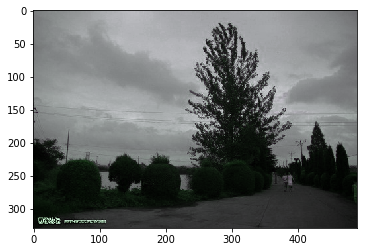

In [9]:
dst = cool_img(rgb)
plt.imshow(dst)